# Study colors in Paranal AT

In [10]:
import sys
sys.path.append("../../")

import pandas as pd
from src.colors import color_paranal as color

import matplotlib.pyplot as plt
import numpy as np


path="../../data/interim/PARANAL/"

## Collect colors by instance

In [2]:
FILES=!ls $path | grep AT

In [3]:
acc=[]

for f in FILES:
    temp_dict={}
    instance=pd.read_csv(path+f)
    instance['color'] = instance['logtext'].apply(color)
    for i, r in instance.iterrows():
        if r['color'] not in temp_dict.keys():
            temp_dict[r['color']] = 1
        else:
            temp_dict[r['color']] += 1
    for k in temp_dict.keys():
        acc.append( {'file': f, 'color': k, 'count': temp_dict[k]} )

colors_by_instance = pd.DataFrame(acc)

## Colors statistics

In [4]:
# of instances:
len(FILES)

568

In [5]:
# of colors
len(colors_by_instance["color"].unique())

1117

In [6]:
# Normalize by # of instaces
colors_by_instance['count-norm'] = colors_by_instance['count'] / len(FILES)

In [7]:
# Normalized totals by color (AVERAGE!)
norm_total = colors_by_instance[["color", "count-norm"]].groupby(["color"]).sum().sort_values('count-norm', ascending=False)
norm_total

,count-norm
color,
INS OPTI1 MOVE Motion execution,32.815141
INS OPTI2 MOVEDONE Motor offset done,32.811620
INS OPTI2 MOVE Motion execution,32.808099
INS OPTI1 MOVEDONE Motor offset done,32.808099
WARNING new header block added the FITS file,30.713028
...,...
Data Quality gvar watXtcs Appl_data TCS LCU az altaz axisStd initialised BAD,0.001761
UNFORSEEN time error now {} {} last {} {} diff {} us,0.001761
UNFORSEEN No OBS AIRMASS available,0.001761


In [8]:
# Filtering total above THRESHOLD_MIN_AVG_COUNT
THRESHOLD_MIN_AVG_COUNT = 0.1
norm_total[ norm_total['count-norm'] >= THRESHOLD_MIN_AVG_COUNT ]

,count-norm
color,
INS OPTI1 MOVE Motion execution,32.815141
INS OPTI2 MOVEDONE Motor offset done,32.811620
INS OPTI2 MOVE Motion execution,32.808099
INS OPTI1 MOVEDONE Motor offset done,32.808099
WARNING new header block added the FITS file,30.713028
...,...
OS POS TEL GS5 ALPHA {} {} TEL GS5 DELTA {} {} TEL GS5 MAG {} {} TEL GS5 PPOS POS TEL AO START F TEL M1 PSOUP T TEL M2 RESET F TEL CHOP FREQ {} {} TEL CHOP THRO,0.102113
EL GS2 MAG {} {} TEL GS2 PPOS POS TEL GS3 ALPHA {} {} TEL GS3 DELTA {} {} TEL GS3 MAG {} {} TEL GS3 PPOS POS TEL GS4 ALPHA {} {} TEL GS4 DELTA {} {} TEL GS4 MAG {} {} TEL GS4 PP,0.102113
G MAXRAD {} {} TEL AG TAKE_ACT_POS F TEL AG VIGLIM NONE TEL GS1 ALPHA {} {} TEL GS1 DELTA {} {} TEL GS1 MAG {} {} TEL GS1 PPOS POS TEL GS2 ALPHA {} {} TEL GS2 DELTA {} {} T,0.102113


In [9]:
#colors_by_instance[["color", "count"]].groupby(["color"]).median().sort_values('count', ascending=False)[:50]

## Plots

/Users/jgil/logdelay/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  


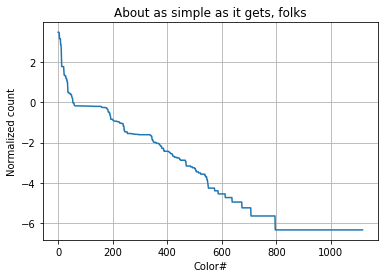

In [11]:
fig, ax = plt.subplots()
ax.plot( np.log(norm_total).get_values())

ax.set(xlabel='Color#', ylabel='Normalized count',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

